In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import tkinter
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from collections import Counter
import os

In [4]:
os.chdir(r'C:\Users\Sarkar\Documents\GitHub\github_repository\churn Prediction Model')

In [5]:
os.listdir()

['.ipynb_checkpoints',
 '1677431997079.pdf',
 'churn prediction model.ipynb',
 'telcomchurn.ipynb',
 'train.csv',
 'WA_Fn-UseC_-Telco-Customer-Churn.csv']

In [8]:
raw_df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Data Set Characteristics
* Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

* Customers who left within the last month – the column is called Churn
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents


#  Dataset Attributes
1. customerID - Customer ID
2. gender - Whether the customer is a male or a female
3. SeniorCitizen - Whether the customer is a senior citizen (1, 0)
4. Partner - Whether the customer has a partner (Yes, No)
5. Dependents - Whether the customer has dependents (Yes, No)
6. tenure - Number of months the customer has stayed with the company
7. PhoneService - Whether the customer has a phone service (Yes, No)
8. MultipleLines - Whether the customer has multiple lines (Yes, No, No phone service)
9. InternetService - Customer’s internet service provider (DSL, Fiber optic, No)
10. OnlineSecurity - Whether the customer has online security (Yes, No, No internet service)
11. OnlineBackup - Whether the customer has online backup or not (Yes, No, No internet service)
12. DeviceProtection - Whether the customer has device protection (Yes, No, No internet service)
13. TechSupport - Whether the customer has tech support (Yes, No, No internet service)
14. StreamingTV - Whether the customer has streaming TV service (Yes, No, No internet service)
15. StreamingMovies - Whether the customer has streaming movies service (Yes, No, No internet service)
16. Contract - Indicates the type of the contract (Month-to-month, One year, Two year)
17. PaperlessBilling - Whether the customer has paperless billing (Yes, No)
18. PaymentMethod - Indicates the payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
19. MonthlyCharges - Indicates the current monthly subscription cost of the customer
20. TotalCharges - Indicates the total charges paid by the customer so far
21. Churn - Indicates whether the customer churned

In [9]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Observations in Train dataset:

* There are total of 21 columns: 3 numerical, 16 categorical, 1 id and 1 target column
* 'Total Charges' provides a numerical values, but the numbers are stored as on object
* Some categorical features are stored as a string
* There are 7043 rows in entire data set
* Churn is the target variable

In [10]:
raw_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df = raw_df.drop('customerID', axis=1)

In [12]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
step1 = [len(i.split()) for i in df['TotalCharges']] # splitting individual elements of 'Total_Charges'
step2 = [i for i in range(len(step1)) if step1[i] != 1] # storing the index values of 'Total_Charges' where length is not equal to 1.
print('Number of entries with empty string: ', len(step2))

Number of entries with empty string:  11


In [14]:
df = df.drop(step2, axis = 0).reset_index(drop=True) # Dropping rows with no values in 'Total_charges'

In [15]:
df['TotalCharges'] = df['TotalCharges'].astype(float) # Finally we can convert string to float in 'Total_charges' column

In [16]:
print('Number of duplicated values in training dataset: ', df.duplicated().sum())

Number of duplicated values in training dataset:  22


In [17]:
df.drop_duplicates(inplace=True)
print("Duplicated values dropped succesfully")
print("*" * 100)

Duplicated values dropped succesfully
****************************************************************************************************


In [18]:
# distinction is based on the number of different values in the column

columns = list(df.columns)

categoric_columns = []
numeric_columns = []

for i in columns:
    if len(df[i].unique()) > 6:
        numeric_columns.append(i)
    else:
        categoric_columns.append(i)

categoric_columns = categoric_columns[:-1] # Excluding 'Churn'

In [19]:
numeric_columns

['tenure', 'MonthlyCharges', 'TotalCharges']

In [20]:
# Label Encoding refers to converting the labels into a numeric form. 
# This is only for EDA reasons. Later we will use OneHotEncoder to prepare for model building.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df1 = df.copy()

df1[categoric_columns] = df1[categoric_columns].apply(le.fit_transform)
df1[['Churn']] = df1[['Churn']].apply(le.fit_transform)

In [21]:
df1[numeric_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7010.0,32.520399,24.520441,1.00,9.0000,29.000,56.0000,72.00
MonthlyCharges,7010.0,64.888666,30.064769,18.25,35.7500,70.400,89.9000,118.75
TotalCharges,7010.0,2290.353388,2266.820832,18.80,408.3125,1403.875,3807.8375,8684.80


In [22]:
#Defining colors for the plots
palette = ['#008080','#FF6347', '#E50000', '#D2691E']
palette2 = ['#FF6347', '#008080', '#E50000', '#D2691E']

# checking of imbalnace for target variable

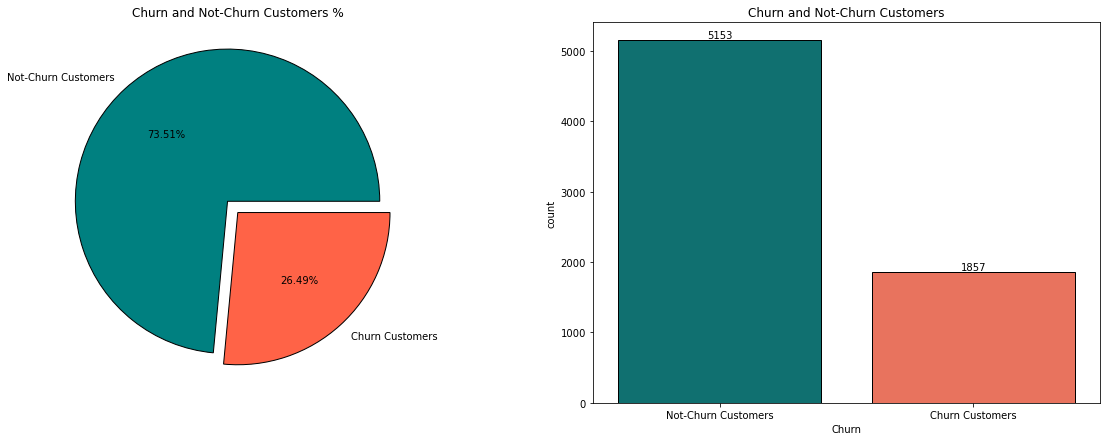

In [23]:
l1 = list(df1['Churn'].value_counts())
pie_values = [l1[0] / sum(l1) * 100, l1[1] / sum(l1) * 100]

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,7))

plt.subplot(1,2,1)
plt.pie(pie_values,labels = ['Not-Churn Customers','Churn Customers'], autopct = '%1.2f%%',
        explode = (0.1,0),colors = palette,wedgeprops = {'edgecolor': 'black','linewidth': 1, 'antialiased' : True})
plt.title('Churn and Not-Churn Customers %');

plt.subplot(1,2,2)
ax = sns.countplot(data = df1, x='Churn',palette = palette, edgecolor = 'black')

for i in ax.containers:
    ax.bar_label(i,)

ax.set_xticklabels(['Not-Churn Customers','Churn Customers'])
plt.title('Churn and Not-Churn Customers')
plt.show()

* Dataset is imbalanced with almost 1:4 ratio. It's not an extreme value, but it's still significant.
* This means that a blind guess (bet on "Not-Churn") would give us accuracy of 73,51%.
* We should use stratified splitting during train-test split.
* We should be extra careful when dealing with outliers (we can delete meaningull information).
* We should consider undersampling or oversampling techniques.
* We want to avoid the situation when we identify churn Customer as not-churn, because in such case we lose the opportunity to prevent churn.
* When a not-churn Customer is identified as churning an extra effort will make no negative effect for the customer, but it will cost us extra effort. We can probably afford this scenario to some extent if it helps with churning customer identification.
* Recall: the ability of a model to find all the relevant cases within a data set.
* ROC-AUC: ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes.

In [24]:
# Checking for distributions
def dist_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols,figsize=(20,5))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.kdeplot(dataset[data], ax=axs[i], fill=True, alpha=0.8, linewidth=0, color='#008080')
        axs[i].set_title(data + ', skewness is '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))

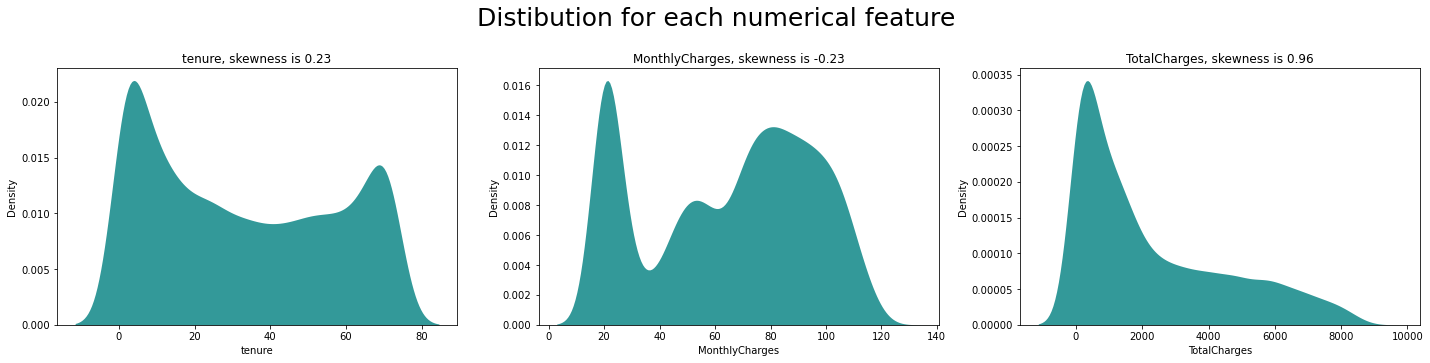

In [25]:
dist_custom(dataset=df1, columns_list=numeric_columns, rows=1, cols=3, suptitle='Distibution for each numerical feature')
plt.tight_layout()

In [26]:
# checking boxplots
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(20,4))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i], palette = palette)
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))

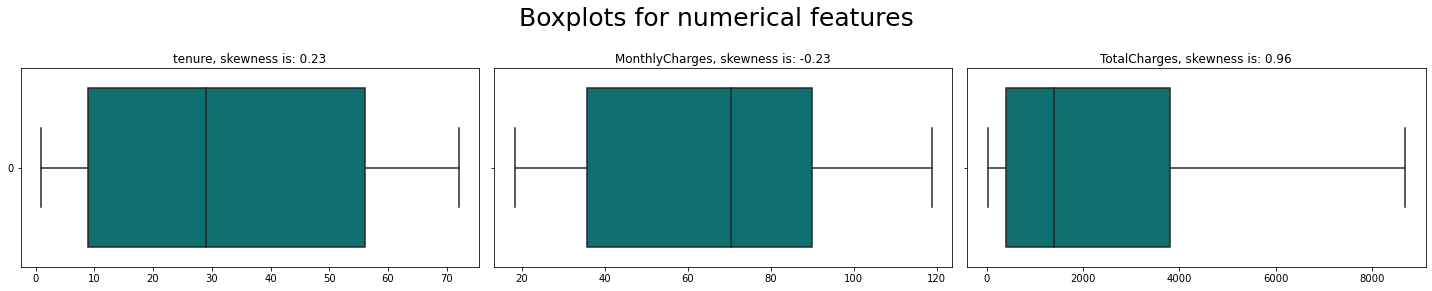

In [27]:
boxplots_custom(dataset=df1, columns_list=numeric_columns, rows=1, cols=3, suptitle='Boxplots for numerical features')
plt.tight_layout()

## Conclusions:

* variables are not normally distributed;
* tenure and MonthlyCharges created kind of a bimodal distribution;
* TotalCharges is rightly skewed.

In [28]:
def IQR_method (df,n,features):
    """
    Takes a dataframe and returns an index list corresponding to the observations 
    containing more than n outliers according to the Tukey IQR method.
    """
    outlier_list = []
    
    for column in features:
        Q1 = np.percentile(df[column], 25)     # 1st quartile (25%)
        Q3 = np.percentile(df[column],75)      # 3rd quartile (75%)
        IQR = Q3 - Q1                          # Interquartile range (IQR)
        outlier_step = 1.5 * IQR               # outlier step
        # Determining a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index
        outlier_list.extend(outlier_list_column) # appending the list of outliers 
        
    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)        
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    
    # Calculate the number of records below and above lower and above bound value respectively
    out1 = df[df[column] < Q1 - outlier_step]
    out2 = df[df[column] > Q3 + outlier_step]
    
    print('Total number of deleted outliers is:', out1.shape[0]+out2.shape[0])
    
    return multiple_outliers

In [29]:
# Detecting and dropping outliers
Outliers_IQR = IQR_method(df,1,numeric_columns)
df_out = df.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

Total number of deleted outliers is: 0


In [30]:
# Checking results
print ('The amount of frauds in df before dropping outliers: ', len(df[df['Churn'] == 1]))
print ('The amount of frauds in df after dropping outliers: ', len(df_out[df_out['Churn'] == 1]))

The amount of frauds in df before dropping outliers:  0
The amount of frauds in df after dropping outliers:  0


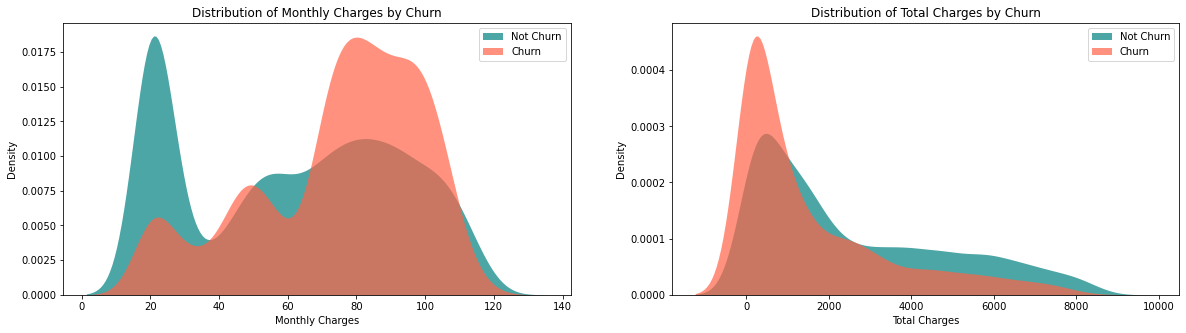

In [31]:
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))

plt.subplot(1,2,1)
ax = sns.kdeplot(df1.MonthlyCharges[(df1["Churn"] == 0)], color='#008080', fill= True, alpha=.7, linewidth=0)
ax = sns.kdeplot(df1.MonthlyCharges[(df1["Churn"] == 1)], color='#FF6347', fill= True, alpha=.7, linewidth=0)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of Monthly Charges by Churn')

plt.subplot(1,2,2)
ax = sns.kdeplot(df1.TotalCharges[(df1["Churn"] == 0)], color='#008080', fill= True, alpha=.7, linewidth=0)
ax = sns.kdeplot(df1.TotalCharges[(df1["Churn"] == 1)], color='#FF6347', fill= True, alpha=.7, linewidth=0)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of Total Charges by Churn')
plt.show()

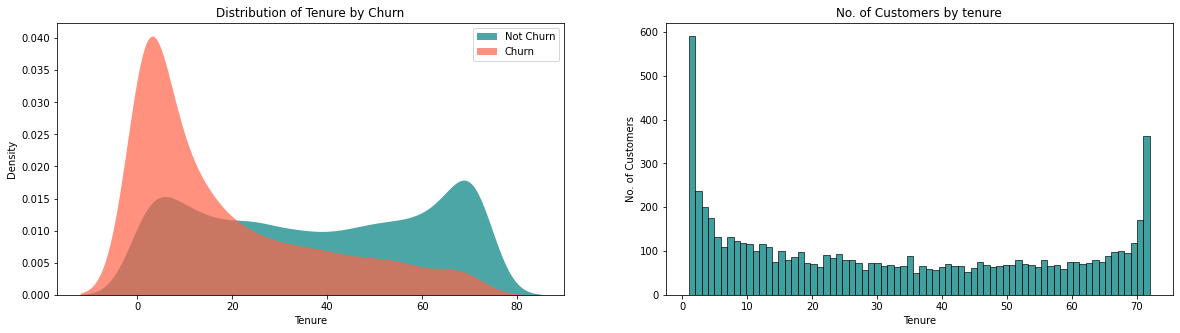

In [32]:
#plt.figure(figsize=(7,3))

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))

plt.subplot(1,2,1)
ax = sns.kdeplot(df1.tenure[(df1["Churn"] == 0)], color='#008080', fill= True, alpha=.7, linewidth=0)
ax = sns.kdeplot(df1.tenure[(df1["Churn"] == 1)], color='#FF6347', fill= True, alpha=.7, linewidth=0)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Tenure')
ax.set_title('Distribution of Tenure by Churn')

plt.subplot(1,2,2)
ax = sns.histplot(df1["tenure"], bins=72, kde=False, color='#008080')
ax.set(title = "No. of Customers by tenure")
ax.set_ylabel('No. of Customers')
ax.set_xlabel('Tenure')

plt.show()

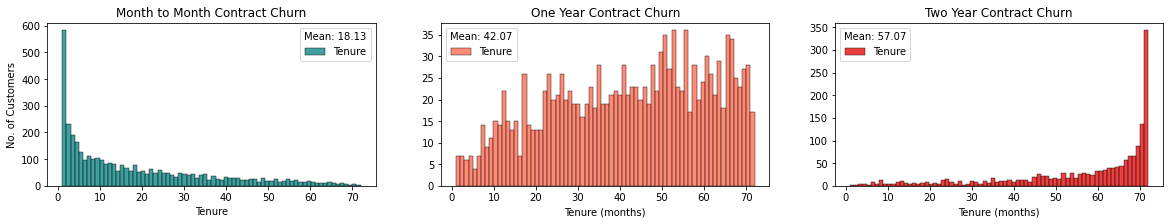

In [33]:
two_year_mean = round(df1[df1['Contract']==2]['tenure'].mean(),2)
month_mean = round(df1[df1['Contract']==0]['tenure'].mean(),2)
year_mean = round(df1[df1['Contract']==1]['tenure'].mean(),2)

fig = plt.subplots(nrows=1, ncols=3, figsize = (20,3))

plt.subplot(1,3,1)
ax = sns.histplot(df1[df1['Contract']==0]['tenure'], bins=72, color = '#008080')
ax.legend(['Tenure'],loc='upper right', title=(f'Mean: {month_mean}'))
ax.set_ylabel('No. of Customers')
ax.set_xlabel('Tenure')
ax.set_title('Month to Month Contract Churn')

plt.subplot(1,3,2)
ax = sns.histplot(df1[df1['Contract']==1]['tenure'], bins=72, color = '#FF6347')
ax.legend(['Tenure'],loc='upper left', title=(f'Mean: {year_mean}'))
ax.set_ylabel('')
ax.set_xlabel('Tenure (months)')
ax.set_title('One Year Contract Churn')

plt.subplot(1,3,3)
ax = sns.histplot(df1[df1['Contract']==2]['tenure'], bins=72, color = '#E50000')
ax.legend(['Tenure'],loc='upper left', title=(f'Mean: {two_year_mean}'))
ax.set_ylabel('')
ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract Churn')

plt.show()

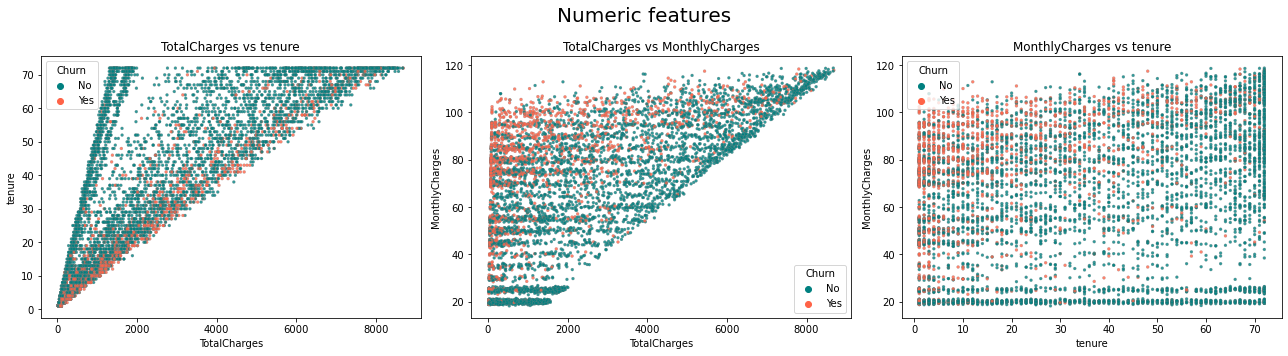

In [34]:
palette2 = ['#008080','#FF6347']

fig = plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
ax1 = sns.scatterplot(x = df['TotalCharges'], y = df['tenure'], hue = "Churn",
                    data = df, palette = palette2, edgecolor='grey', alpha = 0.8, s=9)
plt.title('TotalCharges vs tenure')

plt.subplot(1,3,2)
ax2 = sns.scatterplot(x = df['TotalCharges'], y = df['MonthlyCharges'], hue = "Churn",
                    data = df, palette =palette2, edgecolor='grey', alpha = 0.8, s=9)
plt.title('TotalCharges vs MonthlyCharges')

plt.subplot(1,3,3)
ax2 = sns.scatterplot(x = df['tenure'], y = df['MonthlyCharges'], hue = "Churn",
                    data = df, palette =palette2, edgecolor='grey', alpha = 0.8, s=9)
plt.title('MonthlyCharges vs tenure')

fig.suptitle('Numeric features', fontsize = 20)
plt.tight_layout()
plt.show()

* a lot of customers churned after just a month;
* a lot of customers are with the provider for 72 weeks;
* the longer the contract, the longer customer stays with the provider (higher mean score);
* customers with higher Monthly Charges are more likely to churn;
* the longer the customer has been with the provider the more likely he will not churn.

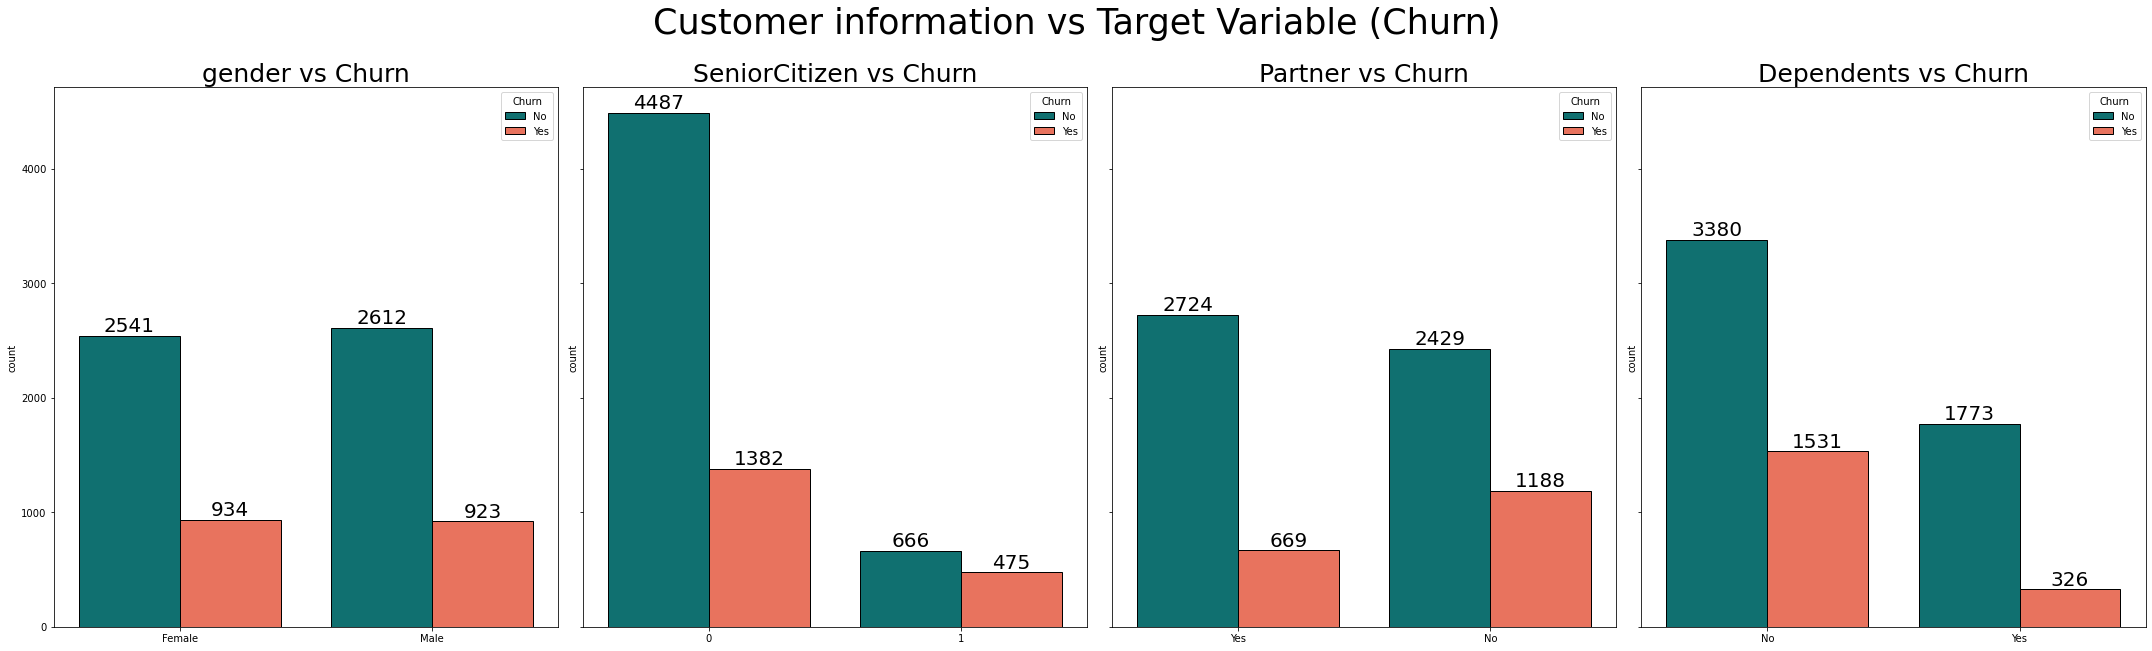

In [35]:
list1 = ['gender','SeniorCitizen','Partner','Dependents']
hue = "Churn"
figsize = (30,9)

# defining function for countplots
def countplots_custom(dataset, columns_list, rows, cols, figsize, suptitle, hue, palette):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=figsize)
    fig.suptitle(suptitle,y=1, size=35)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        ax=sns.countplot(data=dataset, ax=axs[i], x=columns_list[i], hue = hue, palette = palette, edgecolor = 'black')
        axs[i].set_title(data + f' vs {hue}', size=25)
        for i in ax.containers:
            ax.bar_label(i,size=20)
            ax.set_xlabel('')
        
countplots_custom(dataset=df, columns_list=list1, rows=1, cols=4, figsize=figsize, hue = hue, palette = palette, suptitle='Customer information vs Target Variable (Churn)')
plt.tight_layout()

In [36]:
gender = df1[df1['Churn'] == 1]['gender'].value_counts()
pie_values1 = [gender[0] / sum(gender) * 100, gender[1] / sum(gender) * 100]

senior = df1[df1['Churn'] == 1]['SeniorCitizen'].value_counts()
pie_values2 = [senior[0] / sum(senior) * 100, senior[1] / sum(senior) * 100]

partner = df1[df1['Churn'] == 1]['Partner'].value_counts()
pie_values3 = [partner[0] / sum(partner) * 100, partner[1] / sum(partner) * 100]

dependents = df1[df1['Churn'] == 1]['Dependents'].value_counts()
pie_values4 = [dependents[0] / sum(dependents) * 100, dependents[1] / sum(dependents) * 100]

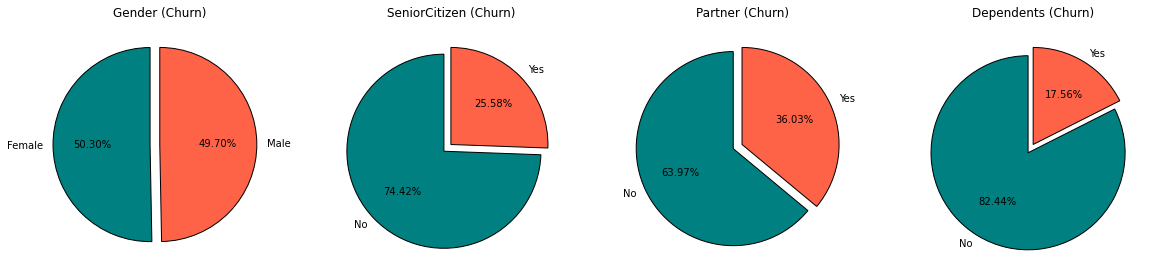

In [37]:
ax,fig = plt.subplots(nrows = 1, ncols = 4, figsize = (20,20))

plt.subplot(1,4,1)
plt.pie(pie_values1,labels = ['Female','Male'],autopct='%1.2f%%',startangle = 90,explode = (0.1,0),colors = palette,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Gender (Churn)')

plt.subplot(1,4,2)
plt.pie(pie_values2,labels = ['No','Yes'],autopct='%1.2f%%',startangle = 90,explode = (0.1,0),colors = palette,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('SeniorCitizen (Churn)')

plt.subplot(1,4,3)
plt.pie(pie_values3,labels = ['No','Yes'],autopct='%1.2f%%',startangle = 90,explode = (0.1,0),colors = palette,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Partner (Churn)')

plt.subplot(1,4,4)
plt.pie(pie_values4,labels = ['No','Yes'],autopct='%1.2f%%',startangle = 90,explode = (0.1,0),colors = palette,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Dependents (Churn)')

plt.show()

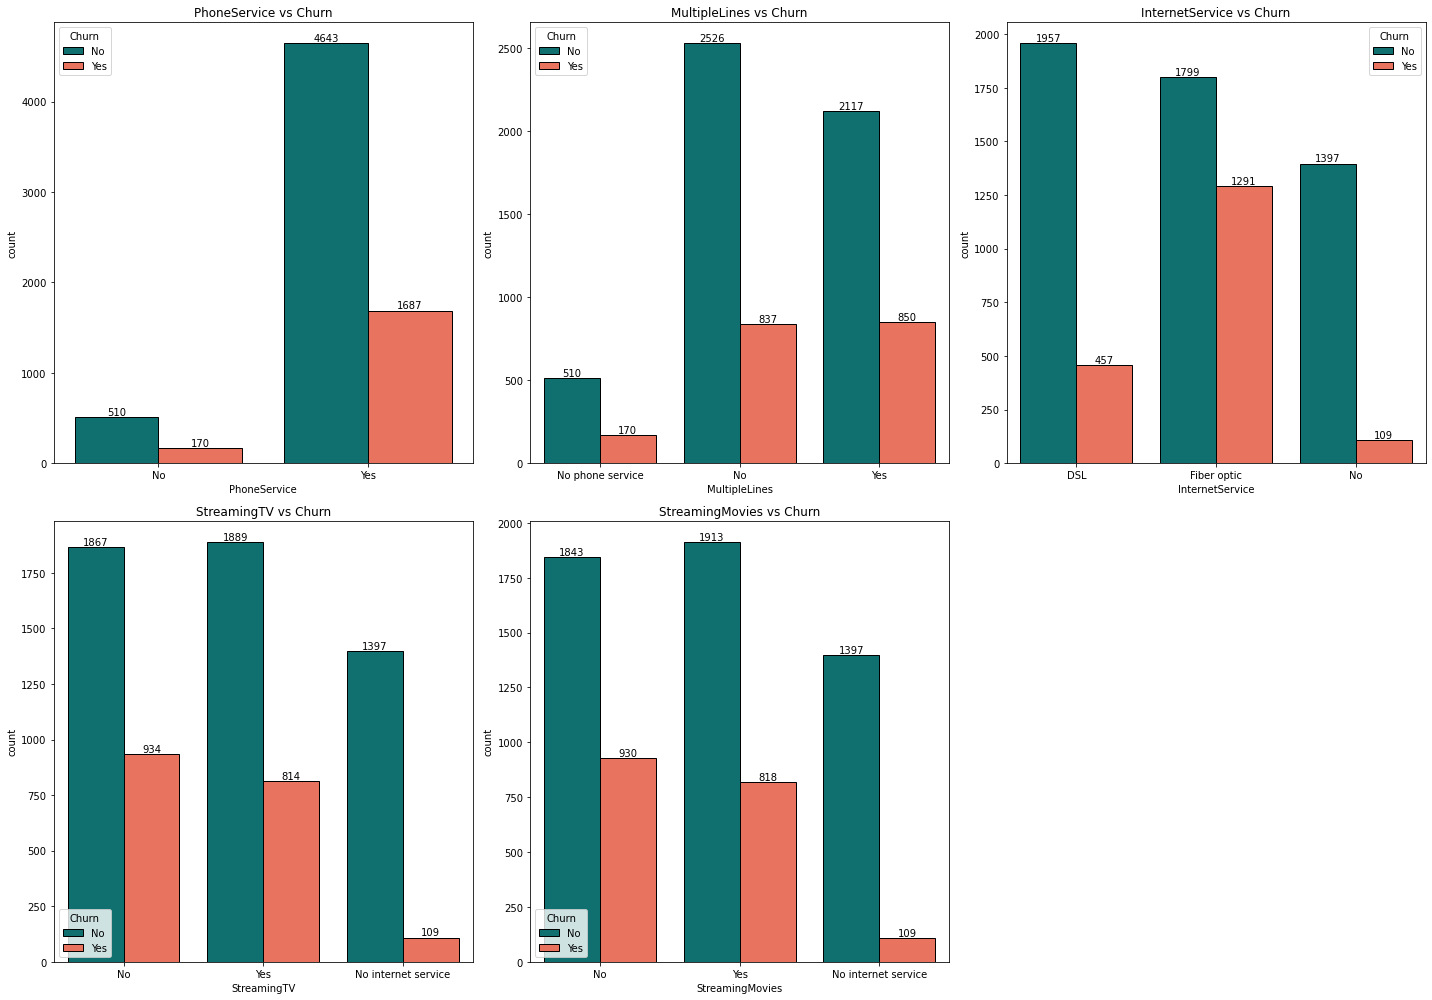

In [38]:
list2 = ['PhoneService', 'MultipleLines', 'InternetService', 'StreamingTV', 'StreamingMovies']
fig = plt.figure(figsize=(20,14))

plt.subplot(2,3,1)
ax = sns.countplot(data = df, x=list2[0], hue = "Churn", palette = palette2, edgecolor = 'black')
ax.legend(loc='upper left', title='Churn')
for i in ax.containers:
    ax.bar_label(i,)
title = list2[0] + ' vs Churn'
plt.title(title);

plt.subplot(2,3,2)
ax = sns.countplot(data = df, x=list2[1], hue = "Churn", palette = palette2, edgecolor = 'black')
ax.legend(loc='upper left', title='Churn')
for i in ax.containers:
    ax.bar_label(i,)
title = list2[1] + ' vs Churn'
plt.title(title);

plt.subplot(2,3,3)
ax = sns.countplot(data = df, x=list2[2], hue = "Churn", palette = palette2, edgecolor = 'black')
ax.legend(loc='upper right', title='Churn')
for i in ax.containers:
    ax.bar_label(i,)
title = list2[2] + ' vs Churn'
plt.title(title)

plt.subplot(2,3,4)
ax = sns.countplot(data = df, x=list2[3], hue = "Churn", palette = palette2, edgecolor = 'black')
ax.legend(loc='lower left', title='Churn')
for i in ax.containers:
    ax.bar_label(i,)
title = list2[3] + ' vs Churn'
plt.title(title);

plt.subplot(2,3,5)
ax = sns.countplot(data = df, x=list2[4], hue = "Churn", palette = palette2, edgecolor = 'black')
ax.legend(loc='lower left', title='Churn')
for i in ax.containers:
    ax.bar_label(i,)
title = list2[4] + ' vs Churn'
plt.title(title);

plt.tight_layout()
plt.show()

In [39]:
phone = df1[df1['Churn'] == 1]['PhoneService'].value_counts()
pie_values1 = [phone[0] / sum(phone) * 100, phone[1] / sum(phone) * 100]

MultipleLines = df1[df1['Churn'] == 1]['MultipleLines'].value_counts()
pie_values2 = [MultipleLines[0] / sum(MultipleLines) * 100, MultipleLines[1] / sum(MultipleLines) * 100, MultipleLines[2] / sum(MultipleLines) * 100]

InternetService = df1[df1['Churn'] == 1]['InternetService'].value_counts()
pie_values3 = [InternetService[0] / sum(InternetService) * 100, InternetService[1] / sum(InternetService) * 100, InternetService[2] / sum(InternetService) * 100]

StreamingTV = df1[df1['Churn'] == 1]['StreamingTV'].value_counts()
pie_values4 = [StreamingTV[0] / sum(StreamingTV) * 100, StreamingTV[1] / sum(StreamingTV) * 100, StreamingTV[2] / sum(StreamingTV) * 100]

StreamingMovies = df1[df1['Churn'] == 1]['StreamingMovies'].value_counts()
pie_values5 = [StreamingMovies[0] / sum(StreamingMovies) * 100, StreamingMovies[1] / sum(StreamingMovies) * 100, StreamingMovies[2] / sum(StreamingMovies) * 100]

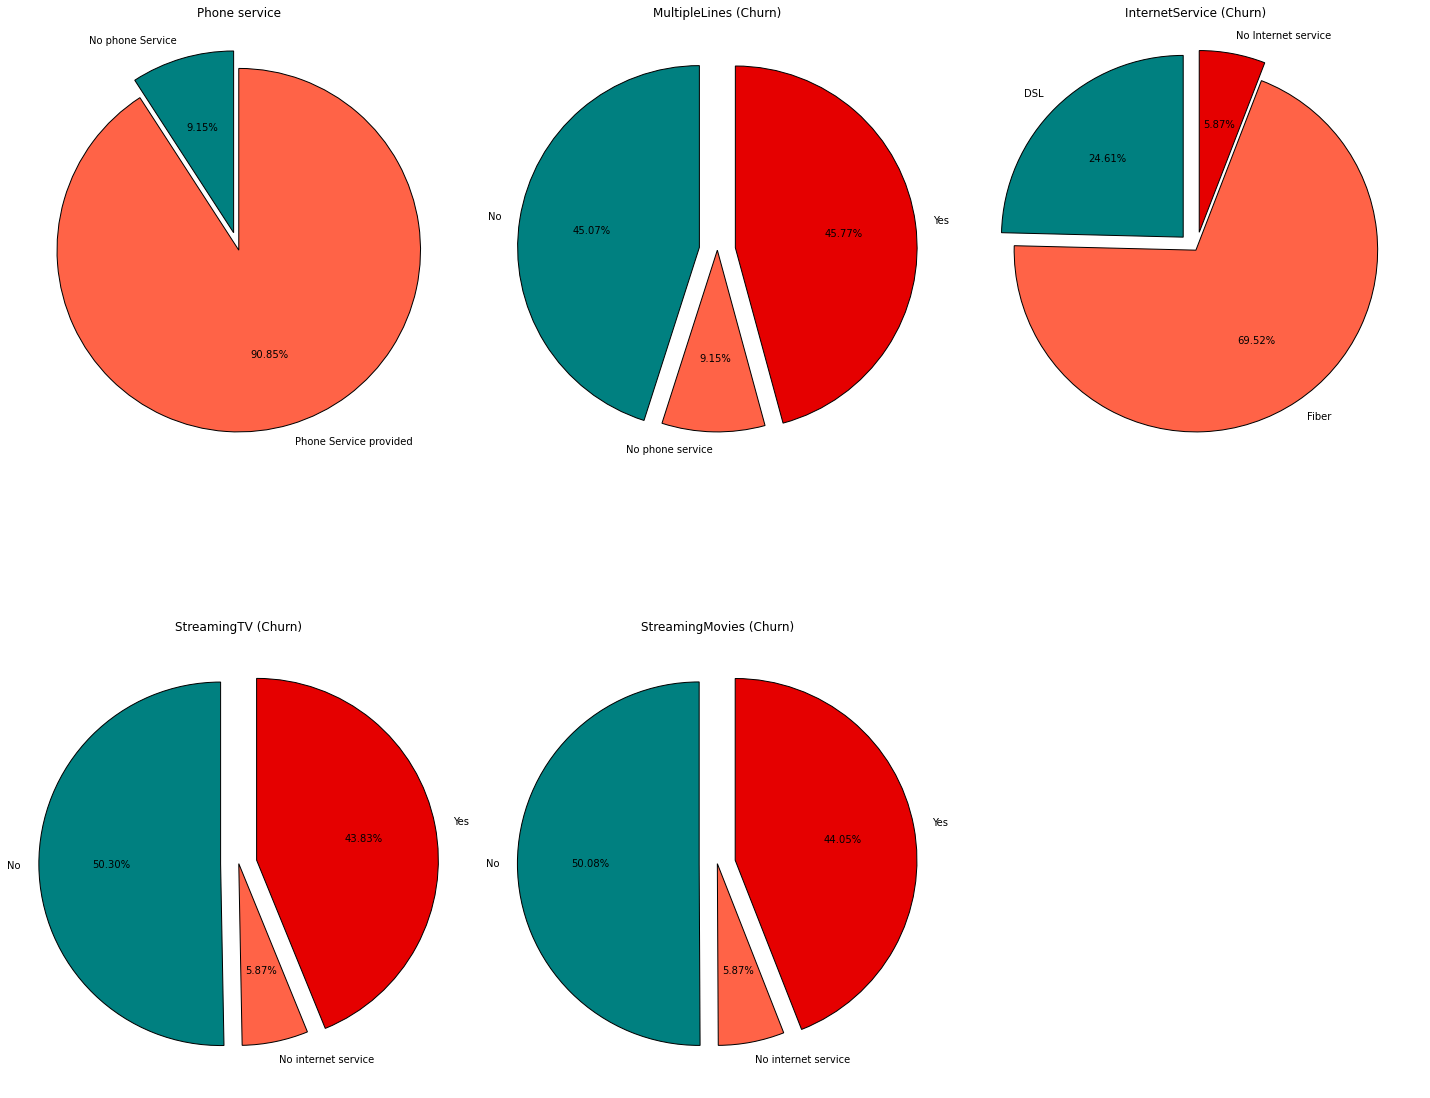

In [40]:
fig = plt.figure(figsize=(20,18))

plt.subplot(2,3,1)
plt.pie(pie_values1,labels = ['No phone Service','Phone Service provided'],autopct='%1.2f%%',startangle = 90,explode = (0.1,0),
        colors = palette,wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Phone service')

plt.subplot(2,3,2)
plt.pie(pie_values2,labels = ['No','No phone service','Yes'],autopct='%1.2f%%',startangle = 90,explode = (0.1,0,0.1),
        colors = palette,wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('MultipleLines (Churn)')

plt.subplot(2,3,3)
plt.pie(pie_values3,labels = ['DSL','Fiber','No Internet service'],autopct='%1.2f%%',startangle = 90,explode = (0.1,0,0.1),
        colors = palette,wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('InternetService (Churn)')

plt.subplot(2,3,4)
plt.pie(pie_values4,labels = ['No','No internet service','Yes'],autopct='%1.2f%%',startangle = 90,explode = (0.1,0,0.1),
        colors = palette,wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('StreamingTV (Churn)')

plt.subplot(2,3,5)
plt.pie(pie_values5,labels = ['No','No internet service','Yes'],autopct='%1.2f%%',startangle = 90,explode = (0.1,0,0.1),
        colors = palette,wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('StreamingMovies (Churn)')

plt.tight_layout()
plt.show()

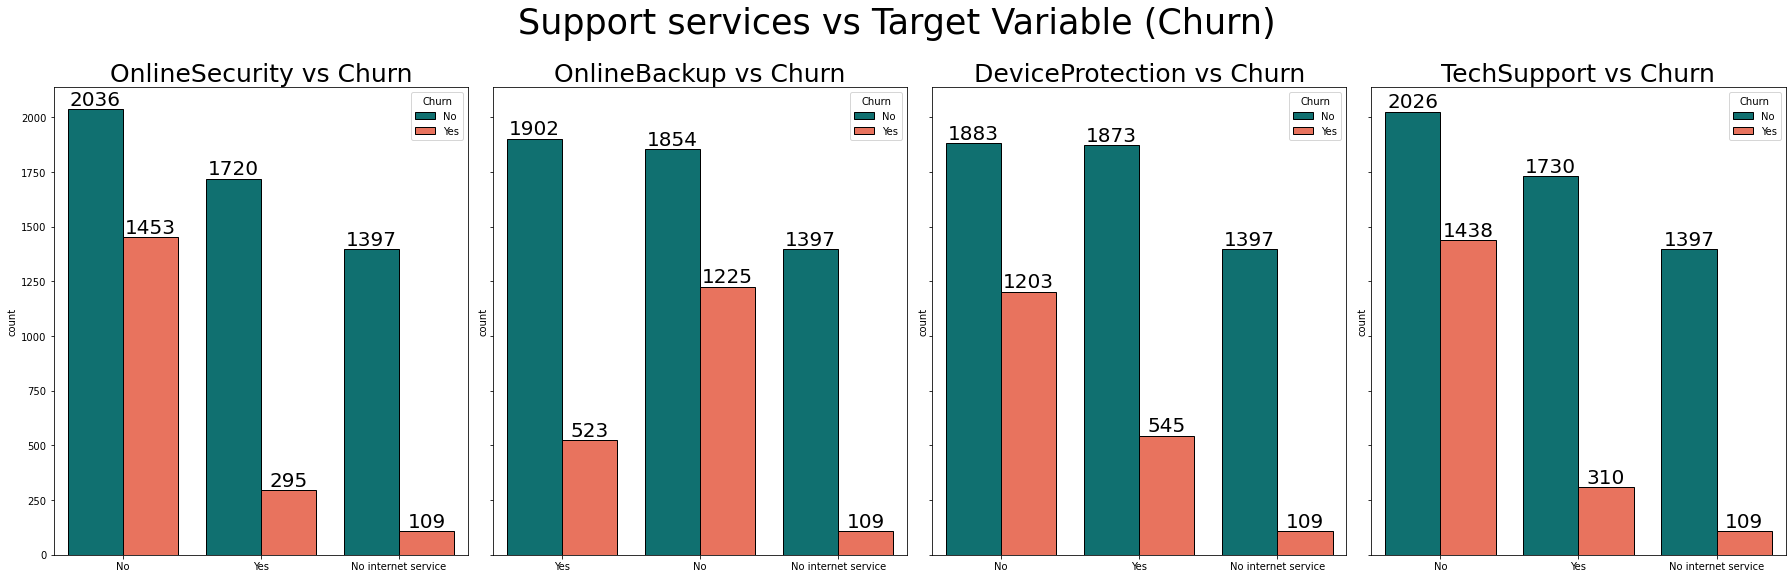

In [41]:
list3 = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']

countplots_custom(dataset=df, columns_list=list3, rows=1, cols=4, figsize=(25,8), hue = hue, palette = palette, suptitle='Support services vs Target Variable (Churn)')
plt.tight_layout()

In [42]:
pie_values1 = df1[df1['Churn'] == 1]['OnlineSecurity'].value_counts()
pie_values1 = [pie_values1[0] / sum(pie_values1) * 100, pie_values1[1] / sum(pie_values1) * 100, pie_values1[2] / sum(pie_values1) * 100]

pie_values2 = df1[df1['Churn'] == 1]['OnlineBackup'].value_counts()
pie_values2 = [pie_values2[0] / sum(pie_values2) * 100, pie_values2[1] / sum(pie_values2) * 100, pie_values2[2] / sum(pie_values2) * 100]

pie_values3 = df1[df1['Churn'] == 1]['DeviceProtection'].value_counts()
pie_values3 = [pie_values3[0] / sum(pie_values3) * 100, pie_values3[1] / sum(pie_values3) * 100, pie_values3[2] / sum(pie_values3) * 100]

pie_values4 = df1[df1['Churn'] == 1]['TechSupport'].value_counts()
pie_values4 = [pie_values4[0] / sum(pie_values4) * 100, pie_values4[1] / sum(pie_values4) * 100, pie_values4[2] / sum(pie_values4) * 100]

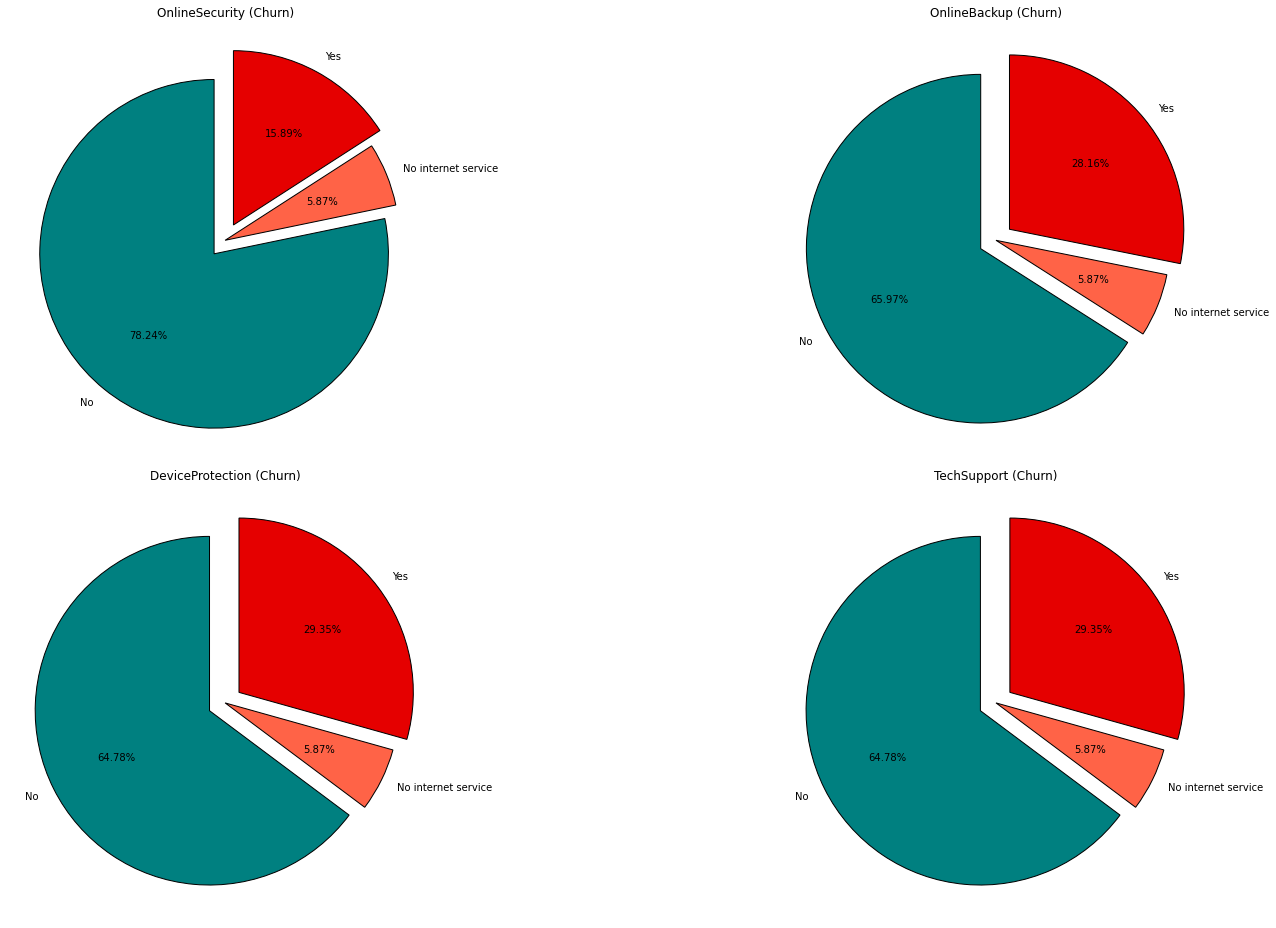

In [43]:
fig = plt.figure(figsize=(25,13))

plt.subplot(2,2,1)
plt.pie(pie_values1,labels = ['No','No internet service','Yes'],autopct='%1.2f%%',startangle = 90,explode = (0.1,0,0.1),
        colors = palette,wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('OnlineSecurity (Churn)')

plt.subplot(2,2,2)
plt.pie(pie_values2,labels = ['No','No internet service','Yes'],autopct='%1.2f%%',startangle = 90,explode = (0.1,0,0.1),
        colors = palette,wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('OnlineBackup (Churn)')

plt.subplot(2,2,3)
plt.pie(pie_values3,labels = ['No','No internet service','Yes'],autopct='%1.2f%%',startangle = 90,explode = (0.1,0,0.1),
        colors = palette,wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('DeviceProtection (Churn)')

plt.subplot(2,2,4)
plt.pie(pie_values3,labels = ['No','No internet service','Yes'],autopct='%1.2f%%',startangle = 90,explode = (0.1,0,0.1),
        colors = palette,wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('TechSupport (Churn)')
plt.tight_layout()
plt.show()

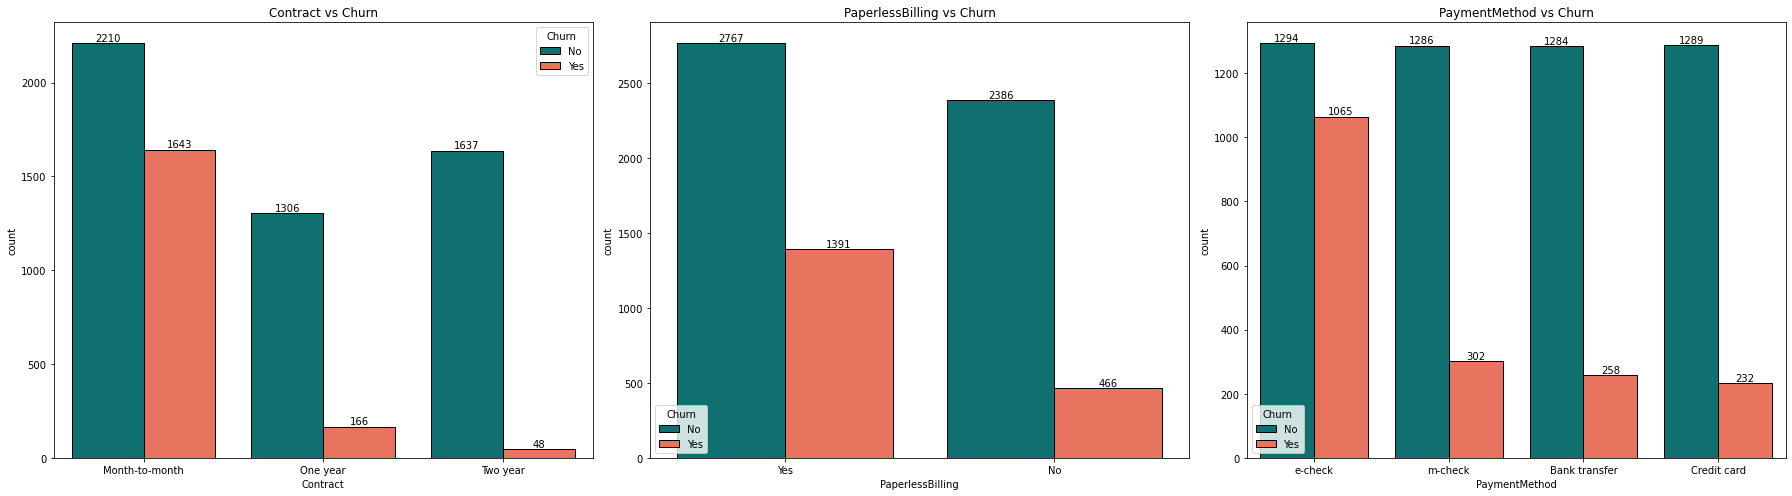

In [44]:
list3 = ['Contract','PaperlessBilling','PaymentMethod']

fig = plt.subplots(nrows = 1, ncols = 3, figsize = (25,7))

plt.subplot(1,3,1)
ax = sns.countplot(data = df, x=list3[0], hue = "Churn", palette = palette2, edgecolor = 'black')
ax.legend(loc='upper right', title='Churn')
for i in ax.containers:
    ax.bar_label(i,)
title = list3[0] + ' vs Churn'
plt.title(title);

plt.subplot(1,3,2)
ax = sns.countplot(data = df, x=list3[1], hue = "Churn", palette = palette2, edgecolor = 'black')
ax.legend(loc='lower left', title='Churn')
for i in ax.containers:
    ax.bar_label(i,)
title = list3[1] + ' vs Churn'
plt.title(title);

plt.subplot(1,3,3)
ax = sns.countplot(data = df, x=list3[2], hue = "Churn", palette = palette2, edgecolor = 'black')
ax.legend(loc='lower left', title='Churn')
for i in ax.containers:
    ax.bar_label(i,)
ax.set_xticklabels(['e-check','m-check','Bank transfer','Credit card'])
title = list3[2] + ' vs Churn'
plt.title(title)

plt.tight_layout()
plt.show()


In [45]:
contract = df1[df1['Churn'] == 1]['Contract'].value_counts()
pie_values1 = [contract[0] / sum(contract) * 100, contract[1] / sum(contract) * 100, contract[2] / sum(contract) * 100]

paperless = df1[df1['Churn'] == 1]['PaperlessBilling'].value_counts()
pie_values2 = [paperless[0] / sum(paperless) * 100, paperless[1] / sum(paperless) * 100] 

payment = df1[df1['Churn'] == 1]['PaymentMethod'].value_counts()
pie_values3 = [payment[0] / sum(payment) * 100, payment[1] / sum(payment) * 100, payment[2] / sum(payment) * 100, payment[3] / sum(payment) * 100] 

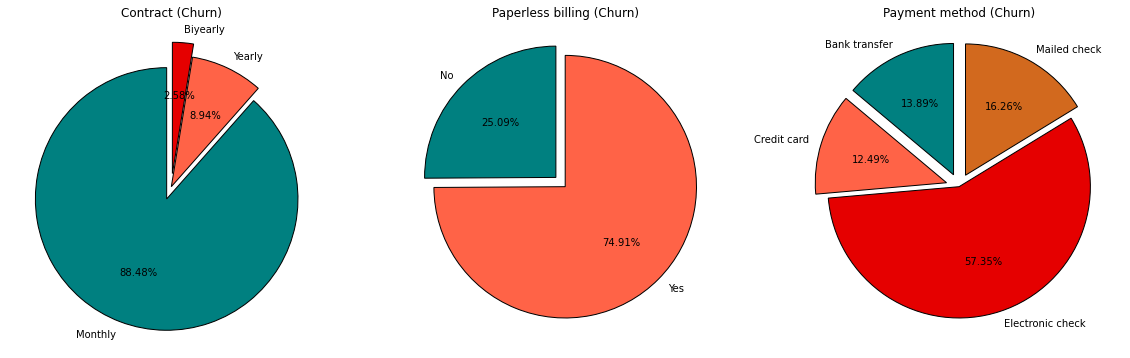

In [46]:
ax,fig = plt.subplots(nrows = 1,ncols = 3,figsize = (20,20))

plt.subplot(1,3,1)
plt.pie(pie_values1,labels = ['Monthly','Yearly','Biyearly'],autopct='%1.2f%%',startangle = 90,explode = (0.1,0,0.1),
        colors = palette,wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Contract (Churn)')

plt.subplot(1,3,2)
plt.pie(pie_values2,labels = ['No','Yes'],autopct='%1.2f%%',startangle = 90,explode = (0.1,0),
        colors = palette,wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Paperless billing (Churn)')

plt.subplot(1,3,3)
plt.pie(pie_values3,labels = ['Bank transfer','Credit card','Electronic check','Mailed check'],autopct='%1.2f%%',
        startangle = 90,explode = (0.1,0.1,0,0.1),colors = palette,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Payment method (Churn)')

plt.show()

* Short term contracts have much higher churn rates.
* Customers with paperless billing are more probable to churn.
* Customers with electronic check as a payment method are much more likely to churn.

In [47]:
df3=df
df3[['Churn']] = df3[['Churn']].apply(le.fit_transform) # Applying LabelEncoder to 'Churn' column

X = df3.drop('Churn', axis=1)
y = df3['Churn']

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.25, random_state = 42)

In [49]:
from sklearn.preprocessing import StandardScaler
Standard_Scaler = StandardScaler()
Standard_Scaler.fit_transform(X_train[numeric_columns])
Standard_Scaler.transform(X_test[numeric_columns])

array([[ 0.27610257,  1.01769998,  0.61931885],
       [-1.24037213, -1.53347618, -0.98780549],
       [-1.28135793, -1.33620306, -0.99803605],
       ...,
       [-1.19938633,  0.13498634, -0.90549797],
       [-0.05178385,  0.98259205,  0.30461881],
       [ 0.39905998,  1.17652156,  0.85307838]])

In [50]:
print(categoric_columns)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [51]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
# Encoding multiple columns. Unfortunately you cannot pass a list here so you need to copy-paste all printed categorical columns.
transformer = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), 
     ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
      'PhoneService', 'MultipleLines', 'InternetService', 
      'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
      'TechSupport', 'StreamingTV', 'StreamingMovies', 
      'Contract', 'PaperlessBilling', 'PaymentMethod']))

In [52]:
transformed = transformer.fit_transform(X_train)    # Transforming
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())   # Transformating back
# One-hot encoding removed index. Let's put it back:
transformed_df.index = X_train.index

# Joining tables
X_train = pd.concat([X_train, transformed_df], axis=1)

X_train.drop(categoric_columns, axis=1, inplace=True) # Dropping categorical columns

In [53]:
transformed = transformer.transform(X_test)   # Transforming
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out()) # Transformating back
# One-hot encoding removed index. Let's put it back:
transformed_df.index = X_test.index

# Joining tables
X_test = pd.concat([X_test, transformed_df], axis=1)

X_test.drop(categoric_columns, axis=1, inplace=True) # Dropping categorical columns

In [54]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score, roc_auc_score
from sklearn.metrics import classification_report

# Feature importance

In [55]:
print(X_train.columns)

Index(['tenure', 'MonthlyCharges', 'TotalCharges',
       'onehotencoder__gender_Female', 'onehotencoder__gender_Male',
       'onehotencoder__SeniorCitizen_0', 'onehotencoder__SeniorCitizen_1',
       'onehotencoder__Partner_No', 'onehotencoder__Partner_Yes',
       'onehotencoder__Dependents_No', 'onehotencoder__Dependents_Yes',
       'onehotencoder__PhoneService_No', 'onehotencoder__PhoneService_Yes',
       'onehotencoder__MultipleLines_No',
       'onehotencoder__MultipleLines_No phone service',
       'onehotencoder__MultipleLines_Yes',
       'onehotencoder__InternetService_DSL',
       'onehotencoder__InternetService_Fiber optic',
       'onehotencoder__InternetService_No', 'onehotencoder__OnlineSecurity_No',
       'onehotencoder__OnlineSecurity_No internet service',
       'onehotencoder__OnlineSecurity_Yes', 'onehotencoder__OnlineBackup_No',
       'onehotencoder__OnlineBackup_No internet service',
       'onehotencoder__OnlineBackup_Yes', 'onehotencoder__DeviceProtection_N

In [56]:
# Setting new feature names

X_train.columns = ['Tenure', 'MonthlyCharges', 'TotalCharges','gender_Female','gender_Male',
       'SeniorCitizen_0','SeniorCitizen_1','Partner_No','Partner_Yes',
       'Dependents_No','Dependents_Yes','PhoneService_No','PhoneService_Yes',
       'MultipleLines_No','MultipleLines_No phone service','MultipleLines_Yes',
       'InternetService_DSL','InternetService_Fiber','InternetService_No',
       'OnlineSecurity_No','OnlineSecurity_NoInternetService','OnlineSecurity_Yes', 
       'OnlineBackup_No','OnlineBackup_NoInternetService','OnlineBackup_Yes', 
       'DeviceProtection_No','DeviceProtection_NoInternetService','DeviceProtection_Yes', 
       'TechSupport_No', 'TechSupport_NoInternetService','TechSupport_Yes', 
       'StreamingTV_No', 'StreamingTV_NoInternetService','StreamingTV_Yes', 
       'StreamingMovies_No','StreamingMovies_NoInternetService','StreamingMovies_Yes',
       'Contract_Month-to-month','Contract_One year', 'Contract_Two year',
       'PaperlessBilling_No','PaperlessBilling_Yes',
       'PaymentMethod_BankTransfer','PaymentMethod_CreditCard','PaymentMethod_ElectronicCheck','PaymentMethod_MailedCheck']

X_test.columns = ['Tenure', 'MonthlyCharges', 'TotalCharges','gender_Female','gender_Male',
       'SeniorCitizen_0','SeniorCitizen_1','Partner_No','Partner_Yes',
       'Dependents_No','Dependents_Yes','PhoneService_No','PhoneService_Yes',
       'MultipleLines_No','MultipleLines_No phone service','MultipleLines_Yes',
       'InternetService_DSL','InternetService_Fiber','InternetService_No',
       'OnlineSecurity_No','OnlineSecurity_NoInternetService','OnlineSecurity_Yes', 
       'OnlineBackup_No','OnlineBackup_NoInternetService','OnlineBackup_Yes', 
       'DeviceProtection_No','DeviceProtection_NoInternetService','DeviceProtection_Yes', 
       'TechSupport_No', 'TechSupport_NoInternetService','TechSupport_Yes', 
       'StreamingTV_No', 'StreamingTV_NoInternetService','StreamingTV_Yes', 
       'StreamingMovies_No','StreamingMovies_NoInternetService','StreamingMovies_Yes',
       'Contract_Month-to-month','Contract_One year', 'Contract_Two year',
       'PaperlessBilling_No','PaperlessBilling_Yes',
       'PaymentMethod_BankTransfer','PaymentMethod_CreditCard','PaymentMethod_ElectronicCheck','PaymentMethod_MailedCheck']
# After renaming the columns

X_train.head()

,Tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_BankTransfer,PaymentMethod_CreditCard,PaymentMethod_ElectronicCheck,PaymentMethod_MailedCheck
1956,42,60.15,2421.60,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3135,14,76.45,1117.55,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5058,44,54.30,2390.45,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4647,32,74.75,2282.95,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
118,41,20.65,835.15,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


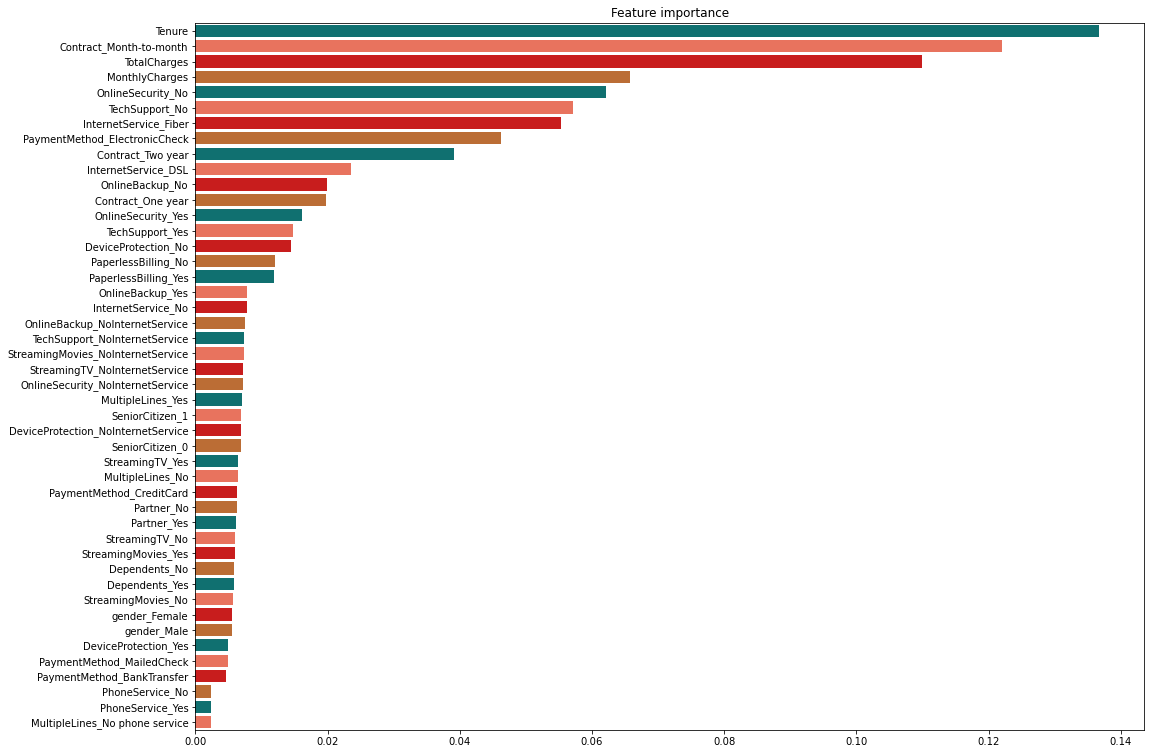

In [57]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=8, min_samples_leaf=3, min_samples_split=3, n_estimators=5000, random_state=13)
clf = clf.fit(X_train, y_train)

fimp = pd.Series(data=clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(17,13))
plt.title("Feature importance")
ax = sns.barplot(y=fimp.index, x=fimp.values, palette=palette, orient='h')

# Baseline - Random Forest

In [58]:
rf = RandomForestClassifier(random_state=13)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [59]:
rf_Recall = recall_score(y_test, y_pred)
rf_Precision = precision_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)
rf_accuracy = accuracy_score(y_test, y_pred)
rf_roc_auc = roc_auc_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1168  121]
 [ 241  223]]


In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1289
           1       0.65      0.48      0.55       464

    accuracy                           0.79      1753
   macro avg       0.74      0.69      0.71      1753
weighted avg       0.78      0.79      0.78      1753



# K-Fold Cross-validation

In [61]:
from statistics import stdev
score = cross_val_score(rf, X_train, y_train, cv=5, scoring='recall', error_score="raise")
rf_cv_score = score.mean()
rf_cv_stdev = stdev(score)
print('Cross Validation Recall scores are: {}'.format(score))
print('Average Cross Validation Recall score: ', rf_cv_score)
print('Cross Validation Recall standard deviation: ', rf_cv_stdev)

Cross Validation Recall scores are: [0.44444444 0.47311828 0.49640288 0.48920863 0.52329749]
Average Cross Validation Recall score:  0.4852943451690261
Cross Validation Recall standard deviation:  0.029154464510727836


In [62]:
ndf = [(rf_Recall, rf_Precision, rf_f1, rf_accuracy, rf_roc_auc, rf_cv_score, rf_cv_stdev)]

rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy', 'ROC-AUC Score', 'Avg CV Recall', 'Standard Deviation of CV Recall'])
rf_score.insert(0, 'Model', 'Random Forest')
rf_score

,Model,Recall,Precision,F1 Score,Accuracy,ROC-AUC Score,Avg CV Recall,Standard Deviation of CV Recall
0,Random Forest,0.480603,0.648256,0.55198,0.793497,0.693366,0.485294,0.029154


# Interpretation:

* Recall score: 0.48 means that in this particular situation we were able to detect 48% of churning customers. We probably expected more so we need to tune our model. Recall is a very important score in our case.
* Avg CV Recall: 0.48 (the same) means that in an average situation we can expect Recall score at about 0.5 (the higher the better). Our model is probably reliable in terms of bringing recurrent results (the same score). That’s a good news.
* Standard Deviation of CV Recall: 0.03 tell us about expected differences with Recall Score (the lower the better). 0.026 is a good result.
* ROC-AUC Score: 0.70 tells us that the model is quite efficient at distinguishing between the churn customers and not churn customers.
* Accuracy: 0.79 tells us that the number of correct predictions (churn and not churn) made by a model in relation to the total number of predictions are 79%. Accuracy is not a good score for imbalanced data set.
* Precision: 0.65 tells us that when our model predicts a churn customer we have a 67% chance that the prediction is accurate (we detected a churn customer).
* F1 Score: 0.55 tells us how efficient our model is, taking into account both: Recall and Precision scores.

# Hyperparameter Tuning Using GridSearchCV

In [63]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [120,130,150,170,190,200],
    'max_depth': [8,10,12,14,15],
    'min_samples_split': [3,4,5,6],
    'min_samples_leaf': [1,2,3],
    'random_state': [13]
}

grid_rf1 = GridSearchCV(rf, param_grid=params, cv=5, scoring='recall').fit(X_train, y_train)

In [64]:
print('Best parameters:', grid_rf1.best_params_)
print('Best score:', grid_rf1.best_score_)

Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 170, 'random_state': 13}
Best score: 0.5147262834893376


In [65]:
params1 = {
    'n_estimators': [170],
    'max_depth': [10],  
    'min_samples_split': [3], 
    'min_samples_leaf': [1], 
    'random_state': [13]
}

grid_rf = GridSearchCV(rf, param_grid=params1, cv=5, scoring='recall').fit(X_train, y_train)

In [66]:
print('Best parameters:', grid_rf.best_params_)
print('Best score:', grid_rf.best_score_)

Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 170, 'random_state': 13}
Best score: 0.5147262834893376


In [67]:
y_pred = grid_rf.predict(X_test)

In [68]:
cm = confusion_matrix(y_test, y_pred)

grid_rf_Recall = recall_score(y_test, y_pred)
grid_rf_Precision = precision_score(y_test, y_pred)
grid_rf_f1 = f1_score(y_test, y_pred)
grid_rf_accuracy = accuracy_score(y_test, y_pred)
grid_roc_auc = roc_auc_score(y_test, y_pred)

print(cm)

[[1162  127]
 [ 230  234]]


# K-Fold Cross-validation

In [69]:
score2 = cross_val_score(grid_rf, X_train, y_train, cv=5, scoring='recall')

In [70]:
grid_cv_score = score2.mean()
grid_cv_stdev = stdev(score2)

print('Cross Validation Recall scores are: {}'.format(score2))
print('Average Cross Validation Recall score: ', grid_cv_score)
print('Cross Validation Recall standard deviation: ', grid_cv_stdev)

Cross Validation Recall scores are: [0.49462366 0.4874552  0.52877698 0.51438849 0.5483871 ]
Average Cross Validation Recall score:  0.5147262834893376
Cross Validation Recall standard deviation:  0.024891837369110867


In [71]:
ndf2 = [(grid_rf_Recall, grid_rf_Precision, grid_rf_f1, grid_rf_accuracy, grid_roc_auc, grid_cv_score, grid_cv_stdev)]

grid_score = pd.DataFrame(data = ndf2, columns=
                        ['Recall','Precision','F1 Score', 'Accuracy', 'ROC-AUC Score', 'Avg CV Recall', 'Standard Deviation of CV Recall'])
grid_score.insert(0, 'Model', 'Random Forest after tuning')
grid_score

,Model,Recall,Precision,F1 Score,Accuracy,ROC-AUC Score,Avg CV Recall,Standard Deviation of CV Recall
0,Random Forest after tuning,0.50431,0.648199,0.567273,0.796349,0.702892,0.514726,0.024892


# Interpretation results after tuning hyperparameters:

* Recall score is better: 0.504 (was: 0.48) - that means that we were able to detect 50% of churning customers.
* Avg CV Recall is better: 0.51 (was: 0.48) - that means that we can expect better average results when it comes to Recall score. This is probably the most important improvement.
* Standard Deviation of CV Recall is almost the same: 0.025 (was: 0.03).
* ROC-AUC Score is: 0.70 - the model is quite efficient at distinguishing between the churn customers and not churn customers.
* Accuracy: 0.80 (the same) - no progress here, but that is not very important.
* Precision: 0.65 (the same) - when our model predicts a churn customer we have a 64% chance that the prediction is accurate (we really detect a churn customer).
* F1 Score: 0.57 - the result is the same.

# XGBoost

In [72]:
from xgboost import XGBClassifier
XGBC = XGBClassifier()
XGBC.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [73]:
y_pred = XGBC.predict(X_test)

In [74]:
XGBC_Recall = recall_score(y_test, y_pred)
XGBC_Precision = precision_score(y_test, y_pred)
XGBC_f1 = f1_score(y_test, y_pred)
XGBC_accuracy = accuracy_score(y_test, y_pred)
XGBC_roc_auc = roc_auc_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1129  160]
 [ 229  235]]


#  K-Fold Cross-validation

In [75]:
score = cross_val_score(XGBC, X_train, y_train, cv=5, scoring='recall', error_score="raise")
XGBC_cv_score = score.mean()
XGBC_cv_stdev = stdev(score)
print('Cross Validation Recall scores are: {}'.format(score))
print('Average Cross Validation Recall score: ', XGBC_cv_score)
print('Cross Validation Recall standard deviation: ', XGBC_cv_stdev)

Cross Validation Recall scores are: [0.47311828 0.4874552  0.54316547 0.5323741  0.4874552 ]
Average Cross Validation Recall score:  0.5047136484360898
Cross Validation Recall standard deviation:  0.030974258006061347


In [76]:
ndf = [(XGBC_Recall, XGBC_Precision, XGBC_f1, XGBC_accuracy, XGBC_roc_auc, XGBC_cv_score, XGBC_cv_stdev)]

XGBC_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy', 'ROC-AUC Score', 'Avg CV Recall', 'Standard Deviation of CV Recall'])
XGBC_score.insert(0, 'Model', 'XGBC')
XGBC_score

,Model,Recall,Precision,F1 Score,Accuracy,ROC-AUC Score,Avg CV Recall,Standard Deviation of CV Recall
0,XGBC,0.506466,0.594937,0.547148,0.778095,0.691169,0.504714,0.030974


# Interpretation after adding XGBoost Clasifier:

* XGBoost is usually very efficient. Scores that we received from the algorithm tells us that we should probably change something more radically to get better results e.g. introduce oversampling and/or undersampling techniques.
* Recall score is better: 0.50 (was: 0.49).
* Avg CV Recall is the same: 0.50.
* Standard Deviation of CV Recall is worse: 0.03.
* ROC-AUC Score is the same: 0.69.
* Accuracy is worse: 0.78 (was: 0.79).
* Precision: is much worse: 0.59 (was: 0.64).
* F1 Score is the same: 0.55.

# Hyperparameter Tuning Using GridSearchCV

In [77]:
params1 = {'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
           'subsample': [0.8],
           'colsample_bytree': [0.8],
           'n_estimators': range(50,500,50),
           'max_depth': range(3,10,2),
           'min_child_weight': range(1,6,2)}

grid_xgb1 = GridSearchCV(XGBC, param_grid=params1, cv=5, scoring='recall').fit(X_train, y_train)

In [78]:
print('Best parameters:', grid_xgb1.best_params_)
print('Best score:', grid_xgb1.best_score_)

Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.3, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.8}
Best score: 0.5319821562105155


In [79]:
params = {'learning_rate': [0.3],
          'subsample': [0.8],
          'colsample_bytree': [0.8],
          'n_estimators': [300],
          'max_depth': [3],
          'min_child_weight': [1]}

grid_xgb = GridSearchCV(XGBC, param_grid=params, cv=5, scoring='recall').fit(X_train, y_train)

In [80]:
print('Best parameters:', grid_xgb.best_params_)
print('Best score:', grid_xgb.best_score_)

Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.3, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.8}
Best score: 0.5319821562105155


In [81]:
y_pred = grid_xgb.predict(X_test)

In [82]:
grid_xgb_Recall = recall_score(y_test, y_pred)
grid_xgb_Precision = precision_score(y_test, y_pred)
grid_xgb_f1 = f1_score(y_test, y_pred)
grid_xgb_accuracy = accuracy_score(y_test, y_pred)
grid_xgb_roc_auc = roc_auc_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1127  162]
 [ 234  230]]


# K-Fold Cross-validation

In [83]:
score = cross_val_score(grid_xgb, X_train, y_train, cv=5, scoring='recall', error_score="raise")
grid_xgb_cv_score = score.mean()
grid_xgb_cv_stdev = stdev(score)
print('Cross Validation Recall scores are: {}'.format(score))
print('Average Cross Validation Recall score: ', grid_xgb_cv_score)
print('Cross Validation Recall standard deviation: ', grid_xgb_cv_stdev)

Cross Validation Recall scores are: [0.47670251 0.50537634 0.5971223  0.51798561 0.56272401]
Average Cross Validation Recall score:  0.5319821562105155
Cross Validation Recall standard deviation:  0.047822359722132834


In [84]:
ndf = [(grid_xgb_Recall, grid_xgb_Precision, grid_xgb_f1, grid_xgb_accuracy, grid_xgb_roc_auc, grid_xgb_cv_score, grid_xgb_cv_stdev)]

grid_xgb_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy', 'ROC-AUC Score', 'Avg CV Recall', 'Standard Deviation of CV Recall'])
grid_xgb_score.insert(0, 'Model', 'Tuned XGBC')
grid_xgb_score

,Model,Recall,Precision,F1 Score,Accuracy,ROC-AUC Score,Avg CV Recall,Standard Deviation of CV Recall
0,Tuned XGBC,0.49569,0.586735,0.537383,0.774102,0.685005,0.531982,0.047822


* Recall score : 0.49 (was: 0.50).
* Avg CV Recall : 0.531 (was 0.504).
* Standard Deviation of CV Recall : 0.047 (was 0.03).
* ROC-AUC Score : 0.685 (was 0.691).
* Accuracy is almost the same: 0.774 (was: 0.778).
* Precision: 0.58 (was 0.59).
* F1 Score : 0.53 (was: 0.55).

In [86]:
predictions = pd.concat([rf_score, grid_score, XGBC_score, grid_xgb_score], ignore_index=True, sort=False)
predictions.sort_values(by=['Avg CV Recall'], ascending=False)

,Model,Recall,Precision,F1 Score,Accuracy,ROC-AUC Score,Avg CV Recall,Standard Deviation of CV Recall
3,Tuned XGBC,0.495690,0.586735,0.537383,0.774102,0.685005,0.531982,0.047822
1,Random Forest after tuning,0.504310,0.648199,0.567273,0.796349,0.702892,0.514726,0.024892
2,XGBC,0.506466,0.594937,0.547148,0.778095,0.691169,0.504714,0.030974
0,Random Forest,0.480603,0.648256,0.551980,0.793497,0.693366,0.485294,0.029154


### Observation

* best trained scores are for Random Forest after tuning

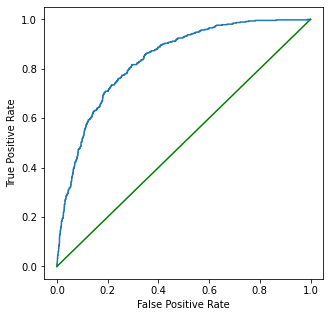

In [87]:
y_proba = grid_rf.predict_proba(X_test)

from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
def plot_auc_roc_curve(y_test, y_pred):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0, 1], color = 'g')
plot_auc_roc_curve(y_test, y_proba[:, 1])

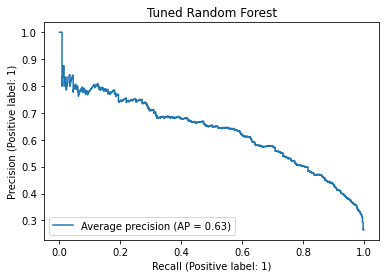

In [89]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    grid_rf, X_test, y_test, name="Average precision")
_ = display.ax_.set_title("Tuned Random Forest")

# Possible further improvements
* We should consider building a model with stacking classifier.
* Introduce more classifiers (from the very beginning) and tune their hyperparameters.
* Try undersampling and oversampling techniques (like TOMEK Links and SMOTE).
* Extend feature engineering especially related to multicollinearity detection.